In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

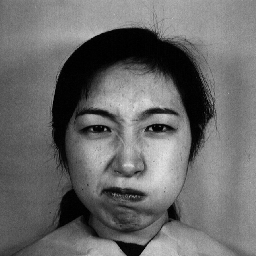

In [5]:
# Displaying example image
img = Image.open('C:/Users/andre/Desktop/AI/Research/jaffe/KA.AN1.39.tiff')
img

In [6]:
# Converting example image to numpy array
img_arr = np.array(img)
img_arr

array([[105, 102, 108, ..., 126, 136, 132],
       [102, 107, 110, ..., 132, 134, 133],
       [ 99, 106, 112, ..., 132, 137, 134],
       ...,
       [ 63,  61,  58, ..., 126, 129, 138],
       [ 59,  63,  55, ..., 115, 122, 139],
       [ 55,  56,  51, ..., 119, 113, 119]], dtype=uint8)

In [7]:
# Converting all images to numpy arrays and storing them in a single numpy array, faceArraysLarge, which will later be downscaled
import os
faceArraysLarge = []
for filename in os.listdir('C:/Users/andre/Desktop/AI/Research/jaffe'):
    if filename.endswith(".tiff"): 
         img = Image.open('C:/Users/andre/Desktop/AI/Research/jaffe/' + filename)
         img_arr = np.array(img)
         faceArraysLarge.append(img_arr)
faceArraysLarge = np.asarray(faceArraysLarge)
faceArraysLarge.shape

(213, 256, 256)

In [8]:
# Creating y array of labels from scanning the file names
y = []
for filename in os.listdir('C:/Users/andre/Desktop/AI/Research/jaffe'):
    if filename.endswith(".tiff"): 
        if (filename[3:5] == 'NE'):
                y.append(0)
        elif (filename[3:5] == 'SA'):
                y.append(1)
        elif (filename[3:5] == 'SU'):
                y.append(2)
        elif (filename[3:5] == 'HA'):
                y.append(3)
        elif (filename[3:5] == 'FE'):
                y.append(4)
        elif (filename[3:5] == 'AN'):
                y.append(5)
        elif (filename[3:5] == 'DI'):
                 y.append(6)
                
y = np.asarray(y)

C:\Users\andre\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


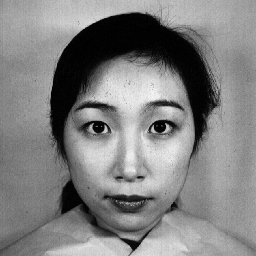

In [9]:
# Downscaling the images to minimize runtime 
from skimage.transform import resize
faceArrays = []
for img in faceArraysLarge:
    img_resized = resize(img, (256, 256), anti_aliasing=True)
    img_rescaled = img_resized * 256
    faceArrays.append(img_rescaled)
faceArrays = np.asarray(faceArrays)

newImg = Image.fromarray(faceArrays[15])
newImg = newImg.convert('L')
newImg

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
faceArrays_train, faceArrays_test, y_train, y_test = train_test_split(faceArrays, y, test_size = 0.30, random_state = 0)

In [26]:
faceArrays_train.shape

(149, 256, 256)

In [27]:
faceArrays_test.shape

(64, 256, 256)

In [29]:
# building the input vector from the 256x256 pixels
faceArrays_train = faceArrays_train.reshape(149, 65536)
faceArrays_test = faceArrays_test.reshape(64, 65536)
faceArrays_train = faceArrays_train.astype('float32')
faceArrays_test = faceArrays_test.astype('float32')

In [30]:
# normalizing the data to help with the training
faceArrays_train /= 255
faceArrays_test /= 255

In [31]:
faceArrays_train.shape

(149, 65536)

In [32]:
faceArrays_test.shape

(64, 65536)

In [33]:
km_model = KMeans(n_clusters=7, random_state=0).fit(faceArrays_train)
km_labels = km_model.fit_predict(faceArrays_train)

In [34]:
# Displays predicted cluster labels as disjoint subsets
km_labels

array([5, 6, 0, 4, 4, 1, 1, 6, 4, 5, 0, 6, 1, 4, 1, 6, 5, 4, 6, 4, 0, 6,
       6, 5, 4, 6, 3, 5, 1, 5, 3, 4, 6, 1, 6, 1, 5, 0, 4, 5, 6, 2, 0, 0,
       4, 0, 6, 5, 6, 5, 3, 3, 1, 6, 5, 6, 6, 6, 1, 0, 4, 2, 1, 1, 2, 3,
       4, 2, 6, 5, 3, 3, 5, 6, 2, 6, 0, 4, 4, 0, 4, 4, 5, 6, 6, 4, 1, 1,
       4, 6, 4, 4, 6, 4, 4, 5, 4, 4, 1, 0, 6, 4, 4, 6, 0, 0, 4, 3, 6, 4,
       4, 0, 5, 4, 5, 4, 4, 6, 2, 4, 2, 6, 5, 0, 2, 2, 4, 0, 2, 0, 4, 3,
       4, 3, 1, 5, 4, 2, 4, 4, 5, 6, 6, 3, 2, 3, 6, 1, 4])

In [35]:
y_train

array([3, 6, 3, 5, 4, 1, 3, 5, 6, 1, 3, 1, 3, 5, 4, 5, 2, 1, 2, 1, 2, 0,
       1, 0, 6, 4, 1, 2, 5, 1, 1, 3, 1, 1, 5, 0, 5, 4, 2, 3, 3, 4, 0, 0,
       2, 4, 3, 6, 4, 4, 5, 3, 4, 6, 5, 4, 1, 4, 2, 5, 1, 5, 6, 6, 2, 2,
       5, 0, 0, 5, 2, 2, 4, 5, 2, 0, 0, 3, 4, 2, 6, 0, 3, 3, 1, 3, 0, 2,
       5, 0, 5, 2, 2, 6, 0, 1, 0, 6, 3, 1, 2, 3, 6, 4, 0, 5, 4, 6, 2, 1,
       4, 2, 0, 4, 2, 6, 4, 0, 1, 6, 0, 4, 2, 0, 6, 3, 5, 1, 1, 4, 6, 3,
       1, 5, 0, 0, 5, 6, 5, 0, 2, 4, 1, 6, 5, 5, 3, 5, 5])

In [36]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y_train, km_labels)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.051265542481896215

In [37]:
km_labelsTest = km_model.fit_predict(faceArrays_test)

In [38]:
normalized_mutual_info_score(y_test, km_labelsTest)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.15730738693872376

Text(0.5, 1.0, 'KMeans Clusters')

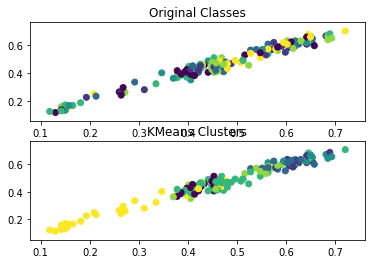

In [39]:
# Training set plots
plt.figure()
plt.subplot(211)
plt.scatter(faceArrays_train[:, 0], faceArrays_train[:, 1], c=y_train)
plt.title("Original Classes")

plt.subplot(212)
plt.scatter(faceArrays_train[:, 0], faceArrays_train[:, 1], c=km_labels)
plt.title("KMeans Clusters")

Text(0.5, 1.0, 'KMeans Clusters')

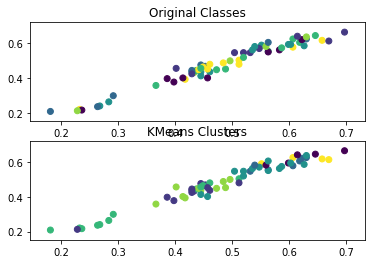

In [40]:
# Test set plots
plt.figure()
plt.subplot(211)
plt.scatter(faceArrays_test[:, 0], faceArrays_test[:, 1], c=y_test)
plt.title("Original Classes")

plt.subplot(212)
plt.scatter(faceArrays_test[:, 0], faceArrays_test[:, 1], c=km_labelsTest)
plt.title("KMeans Clusters")